# Titanic passengers analysis
The purpose of this project is to investigate the Titanic passengers data set and to understand which factors contributed to death or survival of passengers.


In [20]:
from matplotlib import pyplot as plt
import seaborn
import numpy as np
import pandas as pd
import pandas.core.groupby as gb
%matplotlib inline

## Data wrangling
Let's import CSV file with passengers data and get understanding of it. First let's take a look at the beginning of data set.

In [3]:
passengers = pd.read_csv('data/titanic-data.csv')
rows_number = len(passengers.index)
print(f'The size of data set is {rows_number} rows.')
passengers.head()

The size of data set is 891 rows.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


There were more than 2000 passengers onboard Titanic, but we have only 891 rows in our data set, meaning we're working with a sample and not with entire population of passengers.

### Analysing NaN values
It's clear that some of the columns contain _NaN_ in some rows. Let's try to understand how many of the columns need additional filtration. 

In [4]:
def count_nan(series: pd.Series):
    return series[series.isnull()].size


def nans_count_by_column(df: pd.DataFrame) -> pd.DataFrame:
    return df.apply(count_nan).to_frame().transpose()

nans_by_column = nans_count_by_column(passengers)
nans_by_column

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,0,0,0,177,0,0,0,0,687,2


_Age_, _Cabin_ and _Embarked_ columns contain NaN values. Let's transform these values to percentage:

In [5]:
def round2(x):
    return round(x, 2)

nans_percent_by_column = nans_by_column[['Age', 'Cabin', 'Embarked']]\
    .applymap(lambda nans_count: round2(float(nans_count) / rows_number * 100))
nans_percent_by_column

,Age,Cabin,Embarked
0,19.87,77.1,0.22


* _Age_ column is only 80% full. We should be careful with our conclusions based on passenger ages and treat the data set as a sample, because absense of so many data could potentialy skew the results.
* _Cabin_ column is almost empty - less than 23 percent of values in it contain data. Probably we won't be able to use it in our considerations. 
* _Embarked_ column is almost fully set. Later, if we decide to use it for analysis, we could filter the data set by removing all the rows with _Embarked_ value not set. Hopefuly this won't affect the global picture, because the value of rows with _Embarked_ value ommitted is negligent, but anyways, we should treat the dataset with filtered by _Embarked_ column as a sample.

## Analysis of data types
Let's take a look at the data types of our data set:

In [6]:
passengers.dtypes.to_frame().transpose()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,int64,int64,int64,object,object,float64,int64,int64,object,float64,object,object


It looks like all the columns that should contain numerical data were parsed correctly. 
Now let's take a closer look at _Sex_ column. We expect it to contain two types of values _female_ and _male_. Let's check this column:

In [7]:
passengers['Sex'].unique()

array(['male', 'female'], dtype=object)

Indeed, the values in _Sex_ column are of correct type.

## Analysis of survival based on ticket class

Let's try to understand if ticket class has anything to do with survival rate.


In [9]:
survived_by_class: gb.GroupBy = passengers.groupby('Pclass')[['Survived']]
survived_by_class.mean().applymap(round2)

,Survived
Pclass,
1,0.63
2,0.47
3,0.24


The ratios are certainly different with higher survival rates for higher ticket class. Let's try to understand these results are statistically significant. Let's first try to do it for first and third classes - if we get the result that the difference survival rates between the best and worst case is not statistically significant, it should be the same for pairs of first and second classes and second and third classes.

We'll be conducting one-tailed t-test on independent sample:
* We care about the direction. We want to have an answer to the question if being a passenger of a first class you have higher chances of survival.
* t-test because we have only sample of all the passengers aboard titanic, and we don't know the population parameters.
* The sample is independent because we assume that passenger did not change the ticket class.

As independent variable we're taking the ticket class and survival as a dependent variable.

$
H_0: \bar{\mu}_{firstClass} - \bar{\mu}_{thirdClass} \leq 0
$

$
H_A: \bar{\mu}_{firstClass} - \bar{\mu}_{thirdClass} > 0
$

In [10]:
def sum_of_squares(series: pd.Series):
    diff = series - series.mean()
    squares = diff * diff
    return squares.sum()


def pooled_var(s1: pd.Series, s2: pd.Series):
    return (sum_of_squares(s1) + sum_of_squares(s2)) / (s1.count() + s2.count() - 2)


def sem(s1: pd.Series, s2: pd.Series):
    var = pooled_var(s1, s2)
    return np.sqrt(var / s1.count() + var / s2.count())
    

def t_test(s1: pd.Series, s2: pd.Series):
    t_val = (s1.mean() - s2.mean()) / sem(s1, s2)
    ddof = (s1.count() + s2.count() - 2)
    return pd.Series([t_val, ddof], index=['t-value', 'ddof']).apply(round2)

The method ``t_test`` returns a ``pandas.Series`` of two elements with following index:
* ``t-value`` - t-statistics for independent samples using pooled variances to compensate the difference between samples sizes.
* ``ddof`` - degrees of freedom.

Now let's calculate t-statistics for survival mean difference between passengers of first and third classes. 
Let's take $p<.05$

In [23]:
t_test(survived_by_class.get_group(1), survived_by_class.get_group(3))

,Survived
t-value,10.62
ddof,705.00


$t(705) = 10.62, p < 0.05$ one-tailed mean difference

$t_{critical}=1.645$

$t(705) > t_{critical}$

t-value from test is much greater than $t_{critical}$, meaning we are rejecting null hypothesis.
Now let's do the same for the first and second classes:

In [12]:
t_test(survived_by_class.get_group(1), survived_by_class.get_group(2))

,Survived
t-value,3.18
ddof,398.00


$t(398) = 3.18, p < 0.05$ one-tailed mean difference

$t_{critical}=1.660$

$t(398) > t_{critical}$

Again we reject null-hypothesis.
As a conclusion let's conduct a t-test for second and third classes:

In [13]:
t_test(survived_by_class.get_group(2), survived_by_class.get_group(3))

,Survived
t-value,5.93
ddof,673.00


$t(673) = 5.93, p < 0.05$ one-tailed mean difference

$t_{critical}=1.645$

$t(673) > t_{critical}$

We're rejecting the null-hypothesis third time, which means that the chances of survival for the passengers definitely depend on the ticket class with better chances for the passengers of higher classes.

Let's illustrate our conclusion with a graph to show the tendency:

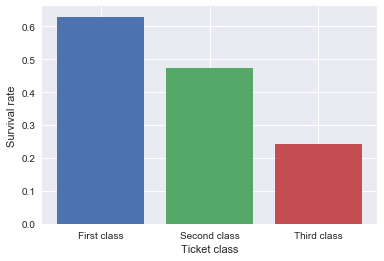

In [25]:
ratios = survived_by_class.mean()['Survived']
for clazz in ratios.index:
    plt.bar(clazz, ratios[clazz])
plt.xticks([1, 2, 3], ['First class', 'Second class', 'Third class'])
plt.ylabel('Survival rate')
plt.xlabel("Ticket class")
pass # prevent garbage to appear in jupyter output

## Women and children first?
I hope not so many readers of this report have been in a life-threatening situation. But probably everyone knows about the code of conduct to save lifes of women and children in case of a disastrous event such as fire or ship sinking. Let's check how it was on Titanic - first we'll analyze the survival ratio by sex and age separately, and after it we'll have comparison of passengers grouped by age and sex.
### Analysis of survival based on sex
Let's first look at survival ratio for males and females


In [15]:
survived_by_sex = passengers.groupby('Sex')[['Survived']]
survived_by_sex.mean().apply(round2)

,Survived
Sex,
female,0.74
male,0.19


Indeed, based on this result, it looks like the odds are not in favor of average male. But let's try to understand if it's a coincidence or the results are statistically significant. Once again we'll be using one-tailed t-test:

$H_0: \bar{\mu}_{female} - \bar{\mu}_{female} \leq 0$

$H_A: \bar{\mu}_{female} - \bar{\mu}_{female} > 0$


In [16]:
t_test(survived_by_sex.get_group('female'), survived_by_sex.get_group('male'))

,Survived
t-value,19.3
ddof,889.0


$t(889) = 19.3, p < 0.05$ one-tailed mean difference

$t_{critical}=1.645$

$t(889) > t_{critical}$

We're rejecting null-hypothesis - with such t-value we can say that women had higher chances of survival than men. The chances are pictured by bar chart below:

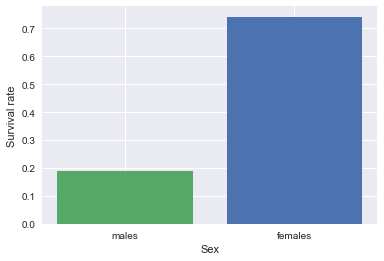

In [24]:
ratios = survived_by_sex.mean()['Survived']
for clazz in ratios.index:
    x = 1 if clazz == 'female' else 0
    plt.bar(x, ratios[clazz])
plt.ylabel('Survival rate')
plt.xlabel('Sex')
plt.xticks([0, 1], ['males', 'females'])
pass # prevent garbage to appear in jupyter output

### Analysis of survival based on age
Now let's take a look if age has anything to do with chances of survival. Gut feeling suggests that children had better chances, but what's about eldery people? Let's do the research.

We already know that around 20% of rows in our dataset doesn't have anything in age column, so we need to filter data first.

In [83]:
# need to copy because we'll be modifying the new data set by adding a column later
passengers_with_age = passengers[~passengers['Age'].isnull()].copy() 
print(f"There are {len(passengers_with_age.index)} passengers with age")
nans_count_by_column(passengers_with_age)

There are 714 passengers with age


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,0,0,0,0,0,0,0,0,529,2


Now it looks better. The original data set had 891 row with 177 rows with missing age value. The filtered data set has only 714 rows, and it appears to be correct because $714 + 177 = 891$. 

Let's look at how many different ages are there:	

In [84]:
len(passengers_with_age['Age'].unique())

88

There are 88 different ages in our data set. It's too much for the purpose of our analysis. So let's split all the passengers into buckets by age

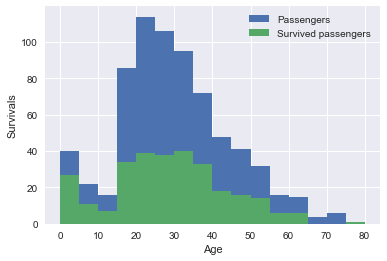

In [85]:
age_bins = range(0, int(passengers_with_age['Age'].max() + 1), 5)
plt.hist(passengers_with_age['Age'], bins=age_bins)
plt.hist(passengers_with_age['Age'][passengers_with_age['Survived'] == 1], bins=age_bins)
plt.ylabel('Survivals')
plt.xlabel('Age')
plt.legend(['Passengers', 'Survived passengers'])
pass

From the histogram it looks like that children under 5 years old had better chances, but let's look at the numbers. We'll have 4 buckets: (0, 5], (5, 10], (10, 15], (15, 20] and (20, max].

In [110]:
age_bins = pd.cut(passengers_with_age['Age'], bins=[0, 5, 10, 15, 20, int(passengers_with_age['Age'].max() + 1)])
passengers_with_age['age_bin'] = age_bins
survived_by_age_bin = passengers_with_age.groupby('age_bin')
survived_by_age_bin['Survived', 'Pclass'].mean()

,Survived,Pclass
age_bin,,
"(0, 5]",0.704545,2.568182
"(5, 10]",0.350000,2.800000
"(10, 15]",0.578947,2.578947
"(15, 20]",0.343750,2.520833
"(20, 81]",0.388785,2.125234


Now that seems odd. Children under 5 and children from 10 to 15 years old had better chances, but children from 5 to 10 have a decrease in survival rate. Can it be explained by ticket class? We already know passengers from lower class had worse chances. _Pclass_ column above shows average class groped by bucket and it looks like the children from 5 to 10 were travelling in a lower class than the rest.
Let's find two correlations here to understand what factor contributed to survival rate more - age or ticket class.

In [133]:
passengers_with_age['sex_as_number'] = passengers_with_age['Sex'] == 'male'
passengers_with_age[['Survived', 'Pclass', 'Age', 'sex_as_number']].corr().applymap(round2)['Survived']

Survived         1.00
Pclass          -0.36
Age             -0.08
sex_as_number   -0.54
Name: Survived, dtype: float64

This is one interesting result. Sex is the strongest contributor to survival, while ticket class had more contribution to one's chances to survive than age. I guess we can say that "women and children first" should be changed to "women and rich people first".
